<center>
    <img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" width="800"> 
</center>  

# Yet another math for DS course: домашнее задание 4

**ФИО:** Теплов Вячеслав Сергеевич

**Забавный факт о себе:** Меня зовут Вячеслав

__Жёсткий дедлайн:__ 23:59MSK 27.10.2024

## Формат сдачи

Сам ноутбук называйте в формате hw-04-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## Задача №1: SVD (5 баллов)

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия" максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

Попробуем поработать с какой-нибудь картинкой.

In [2]:
!pip3 install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 330.3 kB/s eta 0:01:58
   ---------------------------------------- 0.1/38.8 MB 544.7 kB/s eta 0:01:12
   ---------------------------------------- 0.2/38.8 MB 1.0 MB/s eta 0:00:39
   ---------------------------------------- 0.4/38.8 MB 2.2 MB/s eta 0:00:18
    --------------------------------------- 0.7/38.8 MB 3.0 MB/s eta 0:00:13
   - -------------------------------------- 1.1/38.8 MB 4.0 MB/s eta 0:00:10
   -- ------------------------------------- 2.2/38.8 MB 6.6 MB/s eta 0:00:06
   --- ------------------------------------ 3.9/38.8 MB 10.3 MB/s eta 0:00:04
   ----


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import cv2 as cv
img = cv.imread("data/cat.jpg")
img.shape

(360, 543, 3)

In [5]:
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD
img.shape

(360, 543)

Нарисуем картинку.

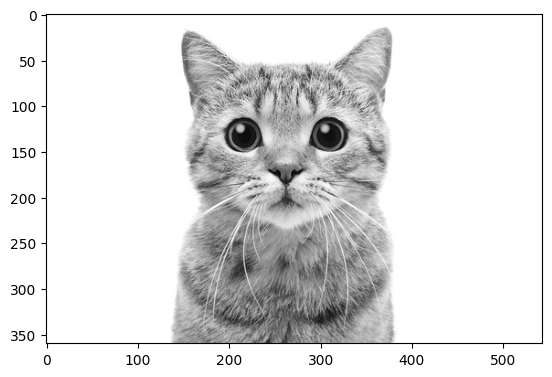

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Построим сингулярное разложение этой матрицы.

In [7]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

__[1 балл]__ Нарисуйте график диагональных элементов матрицы $\Sigma$:

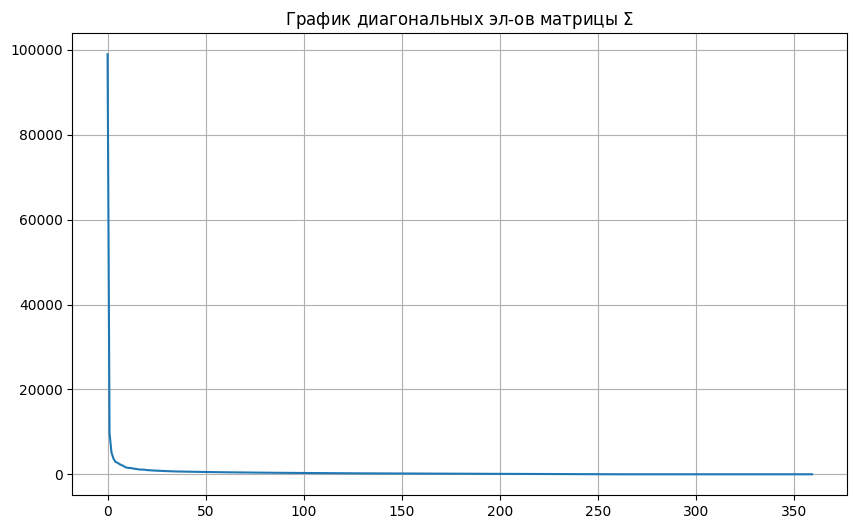

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S)
plt.title('График диагональных эл-ов матрицы $\\Sigma$')
plt.grid(True)
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

__[1 балл]__ Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

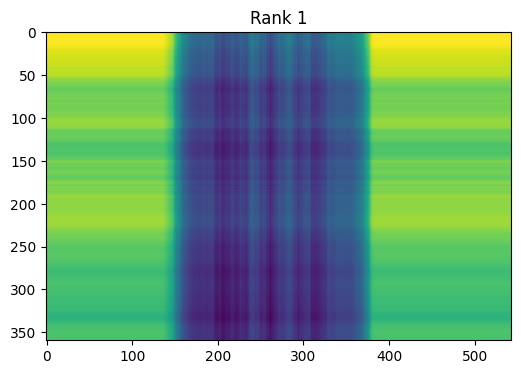

In [18]:
import numpy as np


rank_1 = np.outer(U[:, 0], VT[0, :]) * S[0]

plt.figure(figsize=(6, 6))
plt.imshow(rank_1)
plt.title('Rank 1')
plt.show()

Получается изображение, показывающее лишь крупные горизонтальные и вертикальные вариации, без какой либо детализации, так как компонента ранга 1 — это по сути произведение главных левых и правых сингулярных векторов, умноженное на наибольшее сингулярное значение, поэтому мы теряем детали изображения, сохраняем только "сутрктуру".

__[1 балл]__  Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

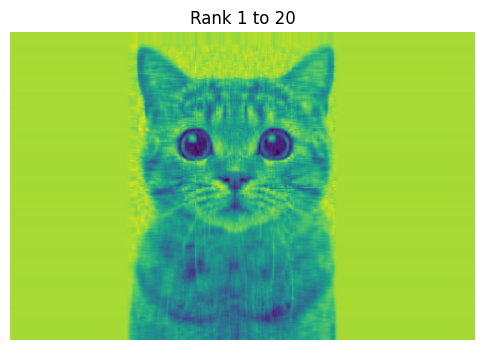

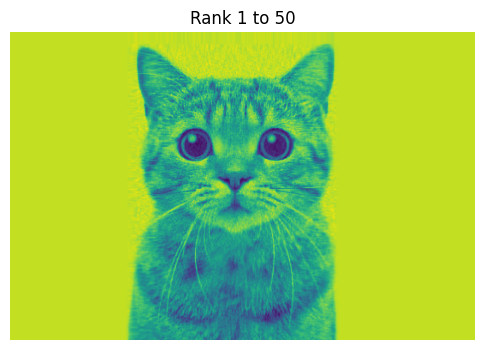

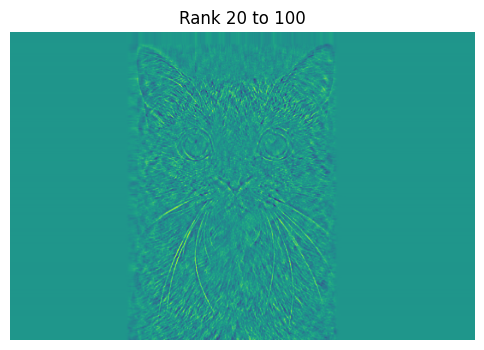

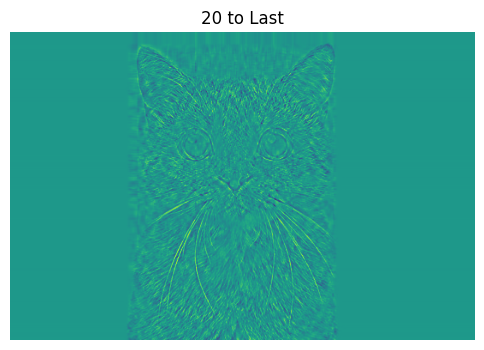

In [19]:
def plot_rank(U, S, VT, start, end, title):
    rank = np.sum([np.outer(U[:, i], VT[i, :]) * S[i]
                  for i in range(start, end)], axis=0)

    plt.figure(figsize=(6, 6))
    plt.imshow(rank)
    plt.title(title)
    plt.axis('off')
    plt.show()


plot_rank(U, S, VT, 0, 20, 'Rank 1 to 20')
plot_rank(U, S, VT, 0, 50, 'Rank 1 to 50')
plot_rank(U, S, VT, 20, 100, 'Rank 20 to 100')
plot_rank(U, S, VT, 20, len(S), '20 to Last')

Первые компоненты SVD захватывают основные черты и структуру изображения, в то время как добавление последующих компонент улучшает четкость и детализированность.
Первые ранги содержат основные черты изображения, последние ранги добавляют мелкие штрихи и шум.

__[1 балл]__  Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

> __Ответ:__ Мы знаем, что большие сингулярные числа содержат основную часть информации, а маленькие — более мелкие детали или шум. Соответсвенно, мы можем оставить только те комполненты, которые хранят в себе большую часть информации об изображении.

Для этого можем использовать кумулятивную дисперсию - сумма сингулярных чисел, выраженная в доле от их общей суммы. Возьмём порог в 90%, чтобы отсеять наименее значимые компоненты.

В результате, оптимальный ранг = 100.

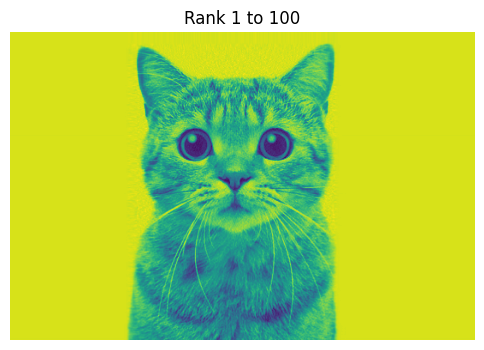

np.int64(100)

In [27]:
# Вычисление кумулятивной дисперсии
cumulative_variance = np.cumsum(S) / np.sum(S)

threshold = 0.9  # Порог в 90%
n = np.searchsorted(cumulative_variance, threshold) + 1

plot_rank(U, S, VT, 0, n, f'Rank 1 to {n}')
n

__[1 балл]__ Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

> __Ответ:__ \
Размер исходного изображения: (360, 543). Память = 360 * 543 \
После SVD и выбора первых 100 компонент: U (360, 100) + S (100, 100) + VT (100, 543) = 360 * 100 + 100 + 100 * 543 \
Отношение: 195480 / 90400 = 2.16 - соответственно, примерно в 2.16 раз меньше потребуется памяти для хранения оптимизированного изображения. 


__[1 балл]__ Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

_Hint:_ достаточно сохранить да файла на компьютер в `.np` формате и сравнить их вес между собой. 

In [30]:
np.save('data/original_cat.npy', img)
np.save('data/U_matrix.npy', U[:, :n])
np.save('data/S_values.npy', S[:n])
np.save('data/VT_matrix.npy', VT[:n, :])

In [31]:
import os

original_size = os.path.getsize('data/original_cat.npy')
U_size = os.path.getsize('data/U_matrix.npy')
S_size = os.path.getsize('data/S_values.npy')
VT_size = os.path.getsize('data/VT_matrix.npy')

svd_size = U_size + S_size + VT_size

original_size, svd_size, original_size / svd_size

(1563968, 723584, 2.161418715726163)

> __Ответ:__ \
Размер исходного изображение: 1 528 KB \
SVD: 723 KB \
Отношение: 2.16 - соответствует отношению из прошлого пункта

Первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


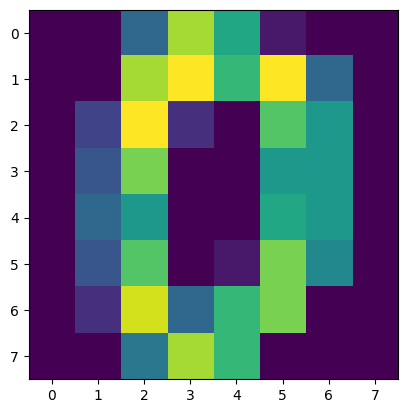

In [32]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

__[1 балл]__ Примените к матрице `digits.data` сингулярное разложение.

In [36]:
U, S, VT = svd(digits.data, full_matrices=False)
U.shape, S.shape, VT.shape

((1797, 64), (64,), (64, 64))

__[1 балл]__  Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

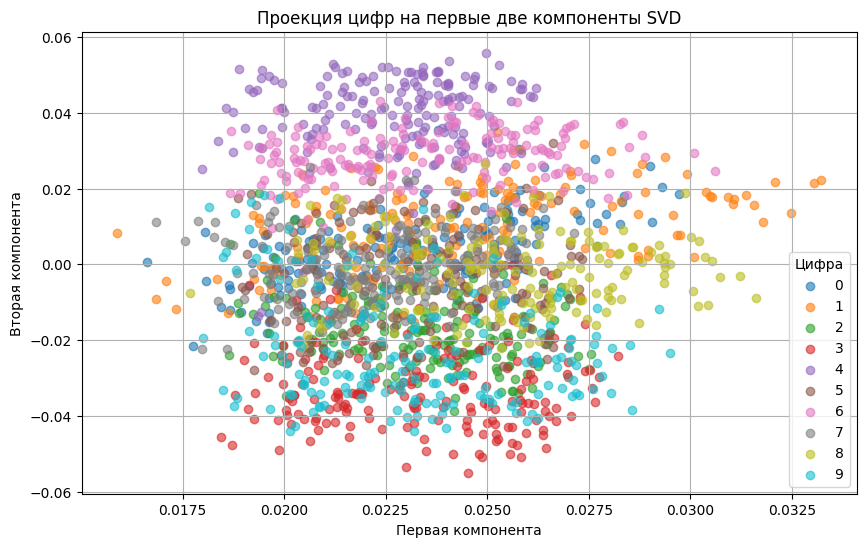

In [39]:
projected_data = U[:, :2]

plt.figure(figsize=(10, 6))

for i in range(10):
    indices = digits.target == i
    plt.scatter(projected_data[indices, 0],
                projected_data[indices, 1], label=str(i), alpha=0.6)

plt.title('Проекция цифр на первые две компоненты SVD')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.legend(title='Цифра')
plt.grid(True)
plt.show()

__[1 балл]__  Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

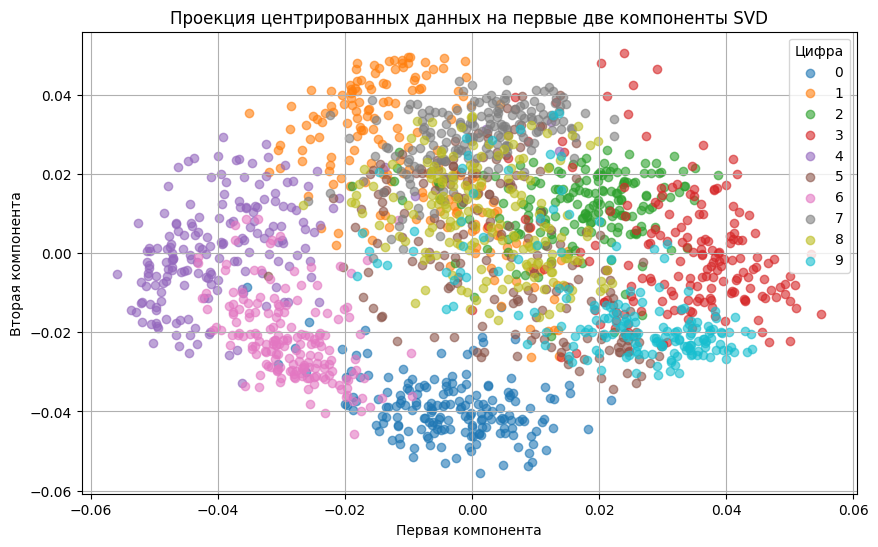

In [40]:
centered_data = digits.data - np.mean(digits.data, axis=0)

U_centered, S_centered, VT_centered = svd(centered_data, full_matrices=False)

projected_centered_data = U_centered[:, :2]

plt.figure(figsize=(10, 6))

for i in range(10):
    indices = digits.target == i
    plt.scatter(projected_centered_data[indices, 0],
                projected_centered_data[indices, 1], label=str(i), alpha=0.6)

plt.title('Проекция центрированных данных на первые две компоненты SVD')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.legend(title='Цифра')
plt.grid(True)
plt.show()

__[1 балл]__  Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

- В первой визуализации, без центрирования, проекция на плоскость может быть смещена из-за различий в средних значениях признаков. Это приводит к тому, что данные могут располагаться с определенным сдвигом или иметь тенденцию к рассеянию, что затрудняет различие между цифрами.
- Во второй визуализации, после центрирования, среднее значение для каждого признака равно нулю, что позволяет сосредоточиться на отклонениях и структуре данных, а не на абсолютных значениях. В результате точки, относящиеся к одной цифре, располагаются более компактно, что делает различие между классами более четким.

__[2 балла (бонус)]__  Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

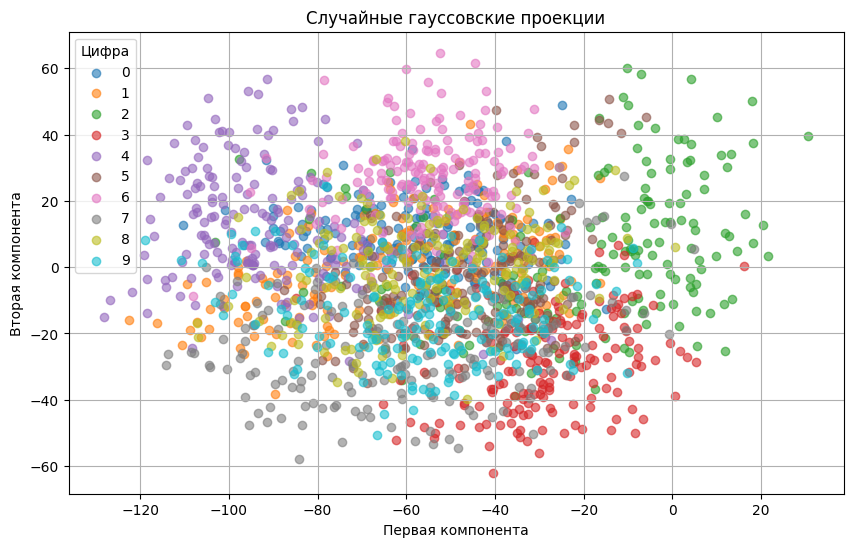

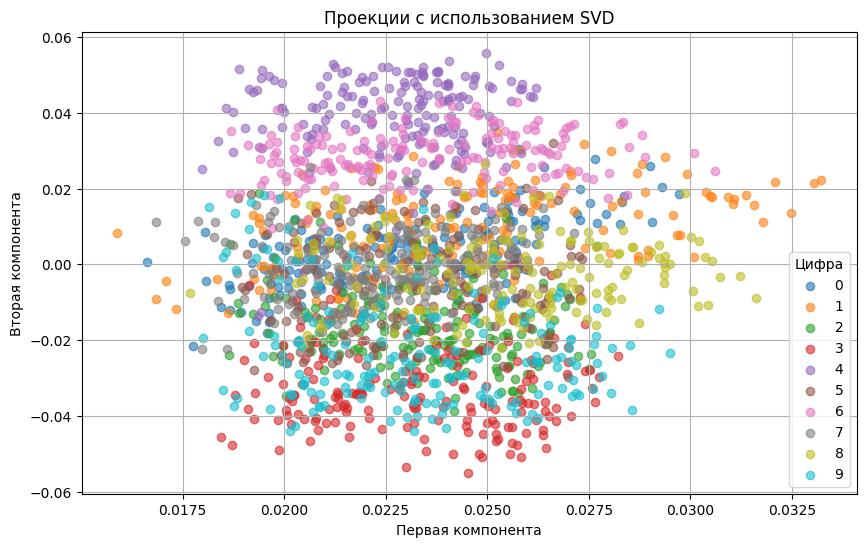

In [43]:
from sklearn.random_projection import GaussianRandomProjection


gaussian_random_proj = GaussianRandomProjection(
    n_components=2, random_state=42)
projected_gaussian = gaussian_random_proj.fit_transform(digits.data)

plt.figure(figsize=(10, 6))

for i in range(10):
    indices = digits.target == i
    plt.scatter(projected_gaussian[indices, 0],
                projected_gaussian[indices, 1], label=str(i), alpha=0.6)

plt.title('Случайные гауссовские проекции')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.legend(title='Цифра')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i in range(10):
    indices = digits.target == i
    plt.scatter(U[:, 0][indices], U[:, 1][indices], label=str(i), alpha=0.6)
plt.title('Проекции с использованием SVD')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.legend(title='Цифра')
plt.grid(True)
plt.show()

__Выводы__:
- SVD обеспечивает лучшее разделение: Проекции, полученные с использованием SVD, показывают четкие кластеры, что свидетельствует о сохранении структуры данных и различий между классами. Этот метод фокусируется на нахождении направлений, в которых данные имеют максимальные различия, что обеспечивает качественное разделение.

- Случайные гауссовские проекции менее структурированы: Случайные проекции, как видно, не обеспечивают качественного разделения данных. Они полезны, если основная цель — это быстрое снижение размерности с минимальными вычислительными затратами, но не подходят для задач, где требуется качественная визуализация и анализ структуры данных.

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*